# Project 2: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), this data contains:
> <li>original_title.</li>
> <li>cast.</li>
> <li>director.</li>
> <li>vote_average (ratings).</li>
> <li>runtime.</li>
> <li>budget.</li>
> <li>revenue.</li>
#### What I Will Explore Through The Analysis:
> <li>Explore Average Performance Trends of Film industry associated with Budget, Revenue, and Net_Income (taking on account inflation over time).</li>
> <li>Explore Average Popularity Performance Trend from year to year.</li>
> <li>Explore Average Ratings Performance Trend from year to year.</li>
> <li>Explore Average Movie Runtime Performance Trend from year to year.</li>
> <li>Statistical Analysis For Numerical Variables.</li>
#### We Will Introduce Some Communicating Results:
> <li>Which genres are most popular from year to year?</li>
> <li>Which Movie is most popular from year to year?</li>
> <li>Which Movie is most profitable from year to year?</li>
> <li>Which Movie is most voted (Ratings) from year to year?</li> 
> <li>Which Movie is most runtime from year to year?</li>
> <li>Also, other detailed communicating results</li>

## Import Required Libraries:

In [1]:
# import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)

<a id='wrangling'></a>
## Data Wrangling and Cleaning

In [3]:
#load dataset:
df = pd.read_csv('tmdb-movies.csv')
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
#drop unwanted columns and re-index columns as we want to make our analysis more helpful:
df_new = df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','release_date'])
required_columns = ['original_title','release_year','cast','director','genres','production_companies','runtime',\
                    'popularity','vote_count','vote_average','budget','revenue','budget_adj','revenue_adj']
df_new = df_new.reindex(columns=required_columns)
df_new.head(5)

original_title  release_year  \
0                Jurassic World          2015   
1            Mad Max: Fury Road          2015   
2                     Insurgent          2015   
3  Star Wars: The Force Awakens          2015   
4                     Furious 7          2015   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  runtime  popularity  \
0  Universal Studios|Amblin Entertainment|Legenda...      124   32.985763   
1  Village Roadshow Pictures|Kennedy Miller Produ...      120   28.419936   
2  Summit Entertainment|Mandeville Films|Red Wago...      119   13.112507   
3          Lucasfilm|Truenorth Productions|Bad Robot      136   11.173104   
4  Universal Pictures|Original Film|Media Rights ...      137    9.335014   

   vote_count  vote_average     budget     revenue    budget_adj   revenue_adj  
0        5562           6.5  150000000  1513528810  1.379999e+08  1.392446e+09  
1        6185           7.1  150000000   378436354  1.379999e+08  3.481613e+08  
2        2480           6.3  110000000   295238201  1.012000e+08  2.716190e+08  
3        5292           7.5  200000000  2068178225  1.839999e+08  1.902723e+09  
4        2947           7.3  190000000  1506249360  1.747999e+08  1.385749e+09

In [5]:
df_new.shape

(10866, 14)

In [6]:
#drop none and NaN values:
df_drop = df_new[ (df_new['revenue']==0)  | (df_new['budget']==0)  ]
df_new.drop(df_drop.index,inplace=True)
df_new.dropna(inplace=True)
df_new.shape

(3806, 14)

In [7]:
#check for duplicated data:
sum(df_new.duplicated())

1

In [8]:
##remove duplicated data and check for duplicated data again:
df_new.drop_duplicates(inplace=True)
sum(df_new.duplicated())

0

In [9]:
#reset index for the new dataset:
df_new.reset_index(drop=True,inplace=True)

In [10]:
#add two new columns
#net_income = revenue - budget
df_new['net_income'] = df_new['revenue'] - df_new['budget']
df_new['net_income_adj'] = df_new['revenue_adj'] - df_new['budget_adj']

In [11]:
#inspect data types to decide if we want to change type(s) to make our analysis more helpful 
df_new.dtypes

original_title           object
release_year              int64
cast                     object
director                 object
genres                   object
production_companies     object
runtime                   int64
popularity              float64
vote_count                int64
vote_average            float64
budget                    int64
revenue                   int64
budget_adj              float64
revenue_adj             float64
net_income                int64
net_income_adj          float64
dtype: object

In [12]:
#change 'release_year' type to string:
df_new['release_year'] = df_new['release_year'].astype(str)
df_new.dtypes

original_title           object
release_year             object
cast                     object
director                 object
genres                   object
production_companies     object
runtime                   int64
popularity              float64
vote_count                int64
vote_average            float64
budget                    int64
revenue                   int64
budget_adj              float64
revenue_adj             float64
net_income                int64
net_income_adj          float64
dtype: object

In [13]:
#add new cloumn that combine two strings:
# movie_year = movie_name + release_year
df_new['movie_year'] = df_new['original_title'] +'('+ df_new['release_year']+')'

In [14]:
df_new.head(5)

original_title release_year  \
0                Jurassic World         2015   
1            Mad Max: Fury Road         2015   
2                     Insurgent         2015   
3  Star Wars: The Force Awakens         2015   
4                     Furious 7         2015   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  runtime  popularity  \
0  Universal Studios|Amblin Entertainment|Legenda...      124   32.985763   
1  Village Roadshow Pictures|Kennedy Miller Produ...      120   28.419936   
2  Summit Entertainment|Mandeville Films|Red Wago...      119   13.112507   
3          Lucasfilm|Truenorth Productions|Bad Robot      136   11.173104   
4  Universal Pictures|Original Film|Media Rights ...      137    9.335014   

   vote_count  vote_average     budget     revenue    budget_adj  \
0        5562           6.5  150000000  1513528810  1.379999e+08   
1        6185           7.1  150000000   378436354  1.379999e+08   
2        2480           6.3  110000000   295238201  1.012000e+08   
3        5292           7.5  200000000  2068178225  1.839999e+08   
4        2947           7.3  190000000  1506249360  1.747999e+08   

    revenue_adj  net_income  net_income_adj  \
0  1.392446e+09  1363528810    1.254446e+09   
1  3.481613e+08   228436354    2.101614e+08   
2  2.716190e+08   185238201    1.704191e+08   
3  1.902723e+09  1868178225    1.718723e+09   
4  1.385749e+09  1316249360    1.210949e+09   

                           movie_year  
0                Jurassic World(2015)  
1            Mad Max: Fury Road(2015)  
2                     Insurgent(2015)  
3  Star Wars: The Force Awakens(2015)  
4                     Furious 7(2015)

In [15]:
df_new.describe(include='all')

original_title release_year  \
count              3805         3805   
unique             3760           56   
top     Friday the 13th         2011   
freq                  2          196   
mean                NaN          NaN   
std                 NaN          NaN   
min                 NaN          NaN   
25%                 NaN          NaN   
50%                 NaN          NaN   
75%                 NaN          NaN   
max                 NaN          NaN   

                                                     cast          director  \
count                                                3805              3805   
unique                                               3784              1683   
top     William Shatner|Leonard Nimoy|DeForest Kelley|...  Steven Spielberg   
freq                                                    5                27   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

       genres production_companies      runtime   popularity   vote_count  \
count    3805                 3805  3805.000000  3805.000000  3805.000000   
unique   1043                 3005          NaN          NaN          NaN   
top     Drama   Paramount Pictures          NaN          NaN          NaN   
freq      243                   77          NaN          NaN          NaN   
mean      NaN                  NaN   109.351117     1.203784   534.159001   
std       NaN                  NaN    19.845678     1.480569   883.757588   
min       NaN                  NaN    15.000000     0.010335    10.000000   
25%       NaN                  NaN    96.000000     0.470651    74.000000   
50%       NaN                  NaN   106.000000     0.810805   209.000000   
75%       NaN                  NaN   119.000000     1.387163   584.000000   
max       NaN                  NaN   338.000000    32.985763  9767.000000   

        vote_average        budget       revenue    budget_adj   revenue_adj  \
count    3805.000000  3.805000e+03  3.805000e+03  3.805000e+03  3.805000e+03   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        6.170565  3.760800e+07  1.089734e+08  4.471977e+07  1.387159e+08   
std         0.792437  4.232179e+07  1.772976e+08  4.488697e+07  2.169973e+08   
min         2.200000  1.000000e+00  2.000000e+00  9.693980e-01  2.370705e+00   
25%         5.700000  1.000000e+07  1.433379e+07  1.354637e+07  1.925371e+07   
50%         6.200000  2.500000e+07  4.621664e+07  3.038360e+07  6.284688e+07   
75%         6.700000  5.000000e+07  1.260695e+08  6.084153e+07  1.658054e+08   
max         8.400000  4.250000e+08  2.781506e+09  4.250000e+08  2.827124e+09   

          net_income  net_income_adj            movie_year  
count   3.805000e+03    3.805000e+03                  3805  
unique           NaN             NaN                  3805  
top              NaN             NaN  The Ugly Truth(2009)  
freq             NaN             NaN                     1  
mean    7.136540e+07    9.399617e+07                   NaN  
std     1.513764e+08    1.950332e+08                   NaN  
min    -4.139124e+08   -4.139124e+08                   NaN  
25%    -1.173477e+06   -1.420000e+06                   NaN  
50%     2.047434e+07    2.851334e+07                   NaN  
75%     8.347333e+07    1.090266e+08                   NaN  
max     2.544506e+09  

#### During investigation, we found that 3805 original movie title with 2760 unique name and that means there is duplicated row (about 45 rows), so we start to investigate these dubplicated rows and we found that there are no duplicated rows, these 45 rows have same movie title only and completely different in rest of the columns. 

In [16]:
duplicated_rows = df_new[df_new['original_title'].duplicated(keep=False)]
duplicated_rows_sorted = duplicated_rows.sort_values(by ='original_title')
duplicated_rows_sorted[['movie_year','cast']]

movie_year  \
584      A Nightmare on Elm Street(2010)   
2739     A Nightmare on Elm Street(1984)   
3172                         Annie(1982)   
243                          Annie(2014)   
2948                        Arthur(1981)   
1217                        Arthur(2011)   
2621                       Beowulf(2007)   
794                        Beowulf(1999)   
3600                        Carrie(1976)   
1890                        Carrie(2013)   
3687                 Casino Royale(1967)   
2218                 Casino Royale(2006)   
2964           Clash of the Titans(1981)   
535            Clash of the Titans(2010)   
3161           Conan the Barbarian(1982)   
1168           Conan the Barbarian(2011)   
3785              Dawn of the Dead(1978)   
2436              Dawn of the Dead(2004)   
2649            Death at a Funeral(2007)   
644             Death at a Funeral(2010)   
3217               Doctor Dolittle(1998)   
3695               Doctor Dolittle(1967)   
623                      Fair Game(2010)   
2858                     Fair Game(1995)   
2066                Fantastic Four(2005)   
58                  Fantastic Four(2015)   
1203                     Footloose(2011)   
2746                     Footloose(1984)   
2540               Friday the 13th(1980)   
479                Friday the 13th(2009)   
1179                  Fright Night(2011)   
2032                  Fright Night(1985)   
3204                      Godzilla(1998)   
190                       Godzilla(2014)   
3787                     Halloween(1978)   
2636                     Halloween(2007)   
2947                  Halloween II(1981)   
459                   Halloween II(2009)   
1747                      Hercules(1997)   
215                       Hercules(2014)   
3603                     King Kong(1976)   
2080                     King Kong(2005)   
67                          Legend(2015)   
2020                        Legend(1985)   
219                      Neighbors(2014)   
2965                     Neighbors(1981)   
3474            Planet of the Apes(1968)   
824             Planet of the Apes(2001)   
3329                   Point Break(1991)   
51                     Point Break(2015)   
79                     Poltergeist(2015)   
3160                   Poltergeist(1982)   
3466                     Project X(1987)   
1530                     Project X(2012)   
3252                        Psycho(1998)   
3593                        Psycho(1960)   
3751                    Robin Hood(1973)   
533                     Robin Hood(2010)   
229                        RoboCop(2014)   
3432                       RoboCop(1987)   
3527                         Shaft(1971)   
3105                         Shaft(2000)   
3523                    Straw Dogs(1971)   
1188                    Straw Dogs(2011)   
176   Teenage Mutant Ninja Turtles(2014)   
3540  Teenage Mutant Ninja Turtles(1990)   
3239                  The Avengers(1998)   
1468                  The Avengers(2012)   
2543                       The Fog(1980)   
2160                       The Fog(2005)   
82                        The Gift(2015)   
3086                      The Gift(2000)   
1853              The Great Gatsby(2013)   
3491              The Great Gatsby(1974)   
2257           The Hills Have Eyes(2006)   
343            The Hills Have Eyes(1977)   
577                 The Karate Kid(2010)   
2738                The Karate Kid(1984)   
3601                      The Omen(1976)   
2294                      The Omen(2006)   
3156                     The Thing(1982)   
1174                     The Thing(2011)   
1137          The Three Musketeers(2011)   
3639          The Three Musketeers(1993)   
3531                  Total Recall(1990)   
1490                  Total Recall(2012)   
1144                       Unknown(2011)   
2306                       Unknown(2006)   
503                         Wanted(2009)   
943                         Wanted(2008)   

                         

<a id='eda'></a>
## Exploratory Data Analysis

### Explore Average Performance Trends of Film industry associated with Budget, Revenue, and Net_Income (taking on account inflation over time):

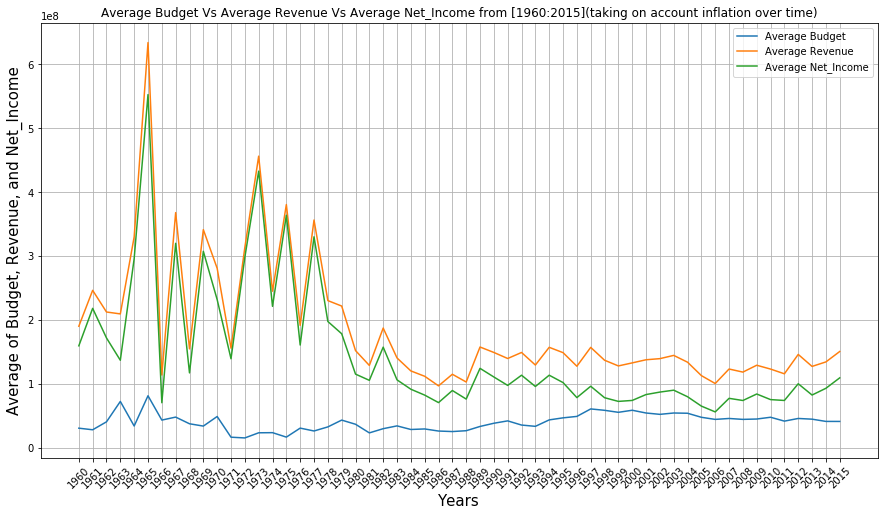

In [17]:
df_group = df_new.groupby('release_year',as_index=False)[['budget_adj','revenue_adj','net_income_adj']].mean()
#df_group
plt.figure(figsize=(15,8))
plt.plot(df_group['release_year'],df_group['budget_adj'],label='Average Budget')
plt.plot(df_group['release_year'],df_group['revenue_adj'],label='Average Revenue')
plt.plot(df_group['release_year'],df_group['net_income_adj'],label='Average Net_Income')
plt.xlabel('Years',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.ylabel('Average of Budget, Revenue, and Net_Income',fontsize=15)
plt.title('Average Budget Vs Average Revenue Vs Average Net_Income from [1960:2015](taking on account inflation over time)')
plt.legend()
plt.grid(True)

#### Comment: In my opinion, as shown above, net-income started to decrease starting 1977 as video tapes started to spread and DVDs later. Recently, we use internet to download and watch movies (free or paid online) instead of going to watch them in cinema. 

In [18]:
def trends_alltimes(df_new,Property,Property_label):
    '''
    Description:
    this function will plot the average given property from year to year using pandas built-in function (groupby) 
    property must be one of these list: ['runtime','popularity','vote_average']
    Hint: property must be in string format
    also the modified data frame will be given
    '''
    df_group = df_new.groupby('release_year',as_index=False)[[Property]].mean()
    plt.figure(figsize=(15,8))
    plt.plot(df_group['release_year'],df_group[Property],label=Property_label)
    plt.xlabel('Years',fontsize=15)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel(Property_label,fontsize=15)
    plt.title(Property_label+' from [1960:2015]')
    plt.legend()
    plt.grid(True)

### Explore Average Popularity Performance Trend from year to year:

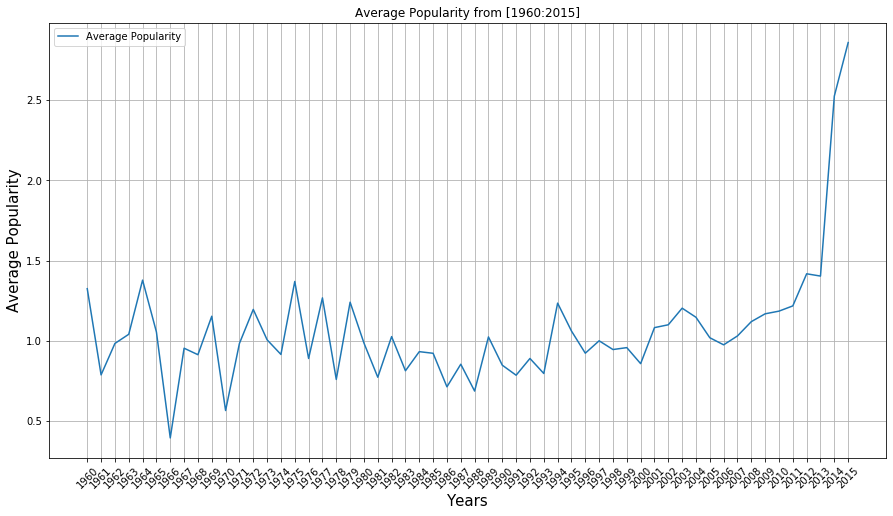

In [19]:
trends_alltimes(df_new,'popularity','Average Popularity')

### Explore Average Ratings Performance Trend from year to year:

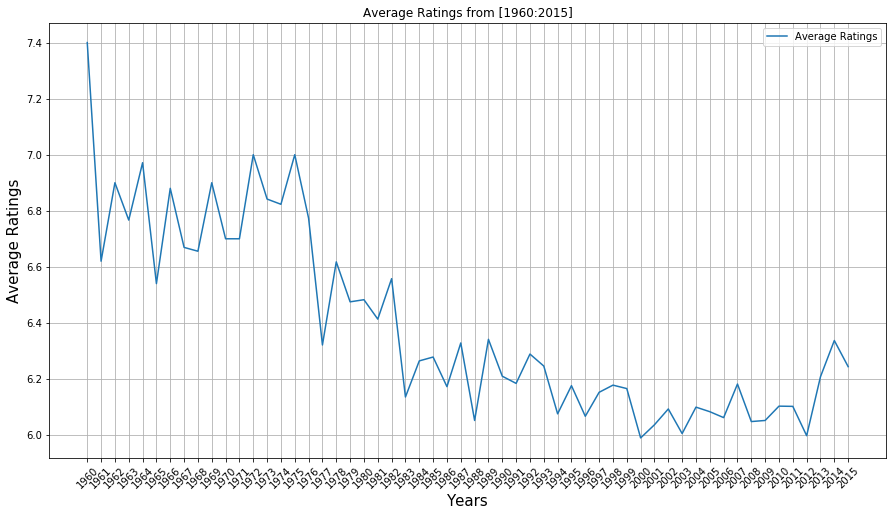

In [20]:
trends_alltimes(df_new,'vote_average','Average Ratings')

### Explore Average Movie Runtime Performance Trend from year to year:

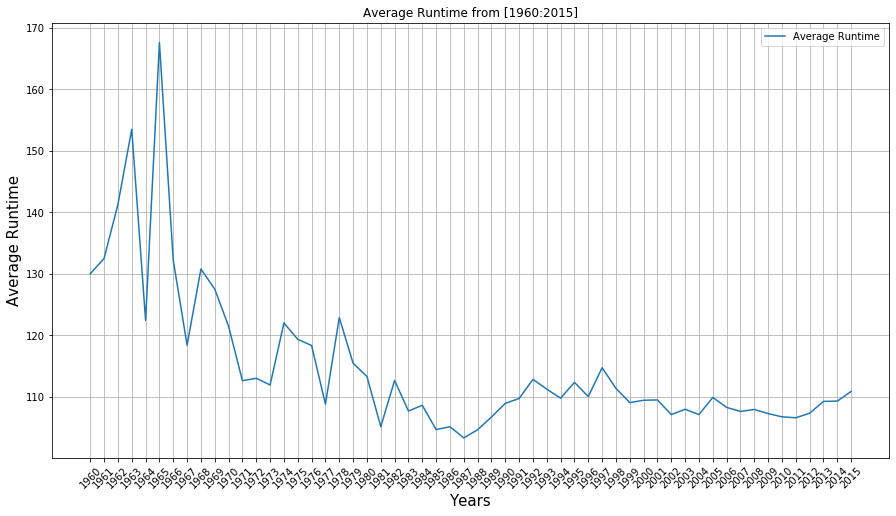

In [21]:
trends_alltimes(df_new,'runtime','Average Runtime')

### Statistical Analysis For Numerical Variables:

In [22]:
df_new.describe()

runtime   popularity   vote_count  vote_average        budget  \
count  3805.000000  3805.000000  3805.000000   3805.000000  3.805000e+03   
mean    109.351117     1.203784   534.159001      6.170565  3.760800e+07   
std      19.845678     1.480569   883.757588      0.792437  4.232179e+07   
min      15.000000     0.010335    10.000000      2.200000  1.000000e+00   
25%      96.000000     0.470651    74.000000      5.700000  1.000000e+07   
50%     106.000000     0.810805   209.000000      6.200000  2.500000e+07   
75%     119.000000     1.387163   584.000000      6.700000  5.000000e+07   
max     338.000000    32.985763  9767.000000      8.400000  4.250000e+08   

            revenue    budget_adj   revenue_adj    net_income  net_income_adj  
count  3.805000e+03  3.805000e+03  3.805000e+03  3.805000e+03    3.805000e+03  
mean   1.089734e+08  4.471977e+07  1.387159e+08  7.136540e+07    9.399617e+07  
std    1.772976e+08  4.488697e+07  2.169973e+08  1.513764e+08    1.950332e+08  
min    2.000000e+00  9.693980e-01  2.370705e+00 -4.139124e+08   -4.139124e+08  
25%    1.433379e+07  1.354637e+07  1.925371e+07 -1.173477e+06   -1.420000e+06  
50%    4.621664e+07  3.038360e+07  6.284688e+07  2.047434e+07    2.851334e+07  
75%    1.260695e+08  6.084153e+07  1.658054e+08  8.347333e+07    1.090266e+08  
max    2.781506e+09  4.250000e+08  2.827124e+09  2.544506e+09    2.750137e+09

In [23]:
df_new.corr()

runtime  popularity  vote_count  vote_average    budget  \
runtime         1.000000    0.213690    0.273464      0.359173  0.259562   
popularity      0.213690    1.000000    0.779125      0.319927  0.443626   
vote_count      0.273464    0.779125    1.000000      0.389853  0.554689   
vote_average    0.359173    0.319927    0.389853      1.000000  0.022945   
budget          0.259562    0.443626    0.554689      0.022945  1.000000   
revenue         0.249178    0.613793    0.753574      0.228051  0.687059   
budget_adj      0.333453    0.395330    0.495209      0.035798  0.958235   
revenue_adj     0.279733    0.544761    0.653202      0.268227  0.530941   
net_income      0.219278    0.594868    0.727533      0.260687  0.525128   
net_income_adj  0.234491    0.515125    0.612792      0.290195  0.370195   

                 revenue  budget_adj  revenue_adj  net_income  net_income_adj  
runtime         0.249178    0.333453     0.279733    0.219278        0.234491  
popularity      0.613793    0.395330     0.544761    0.594868        0.515125  
vote_count      0.753574    0.495209     0.653202    0.727533        0.612792  
vote_average    0.228051    0.035798     0.268227    0.260687        0.290195  
budget          0.687059    0.958235     0.530941    0.525128        0.370195  
revenue         1.000000    0.655872     0.900449    0.979149        0.850906  
budget_adj      0.655872    1.000000     0.567983    0.500278        0.401797  
revenue_adj     0.900449    0.567983     1.000000    0.906199        0.981896  
net_income      0.979149    0.500278     0.906199    1.000000        0.893113  
net_income_adj  0.850906    0.401797     0.981896    0.893113        1.000000

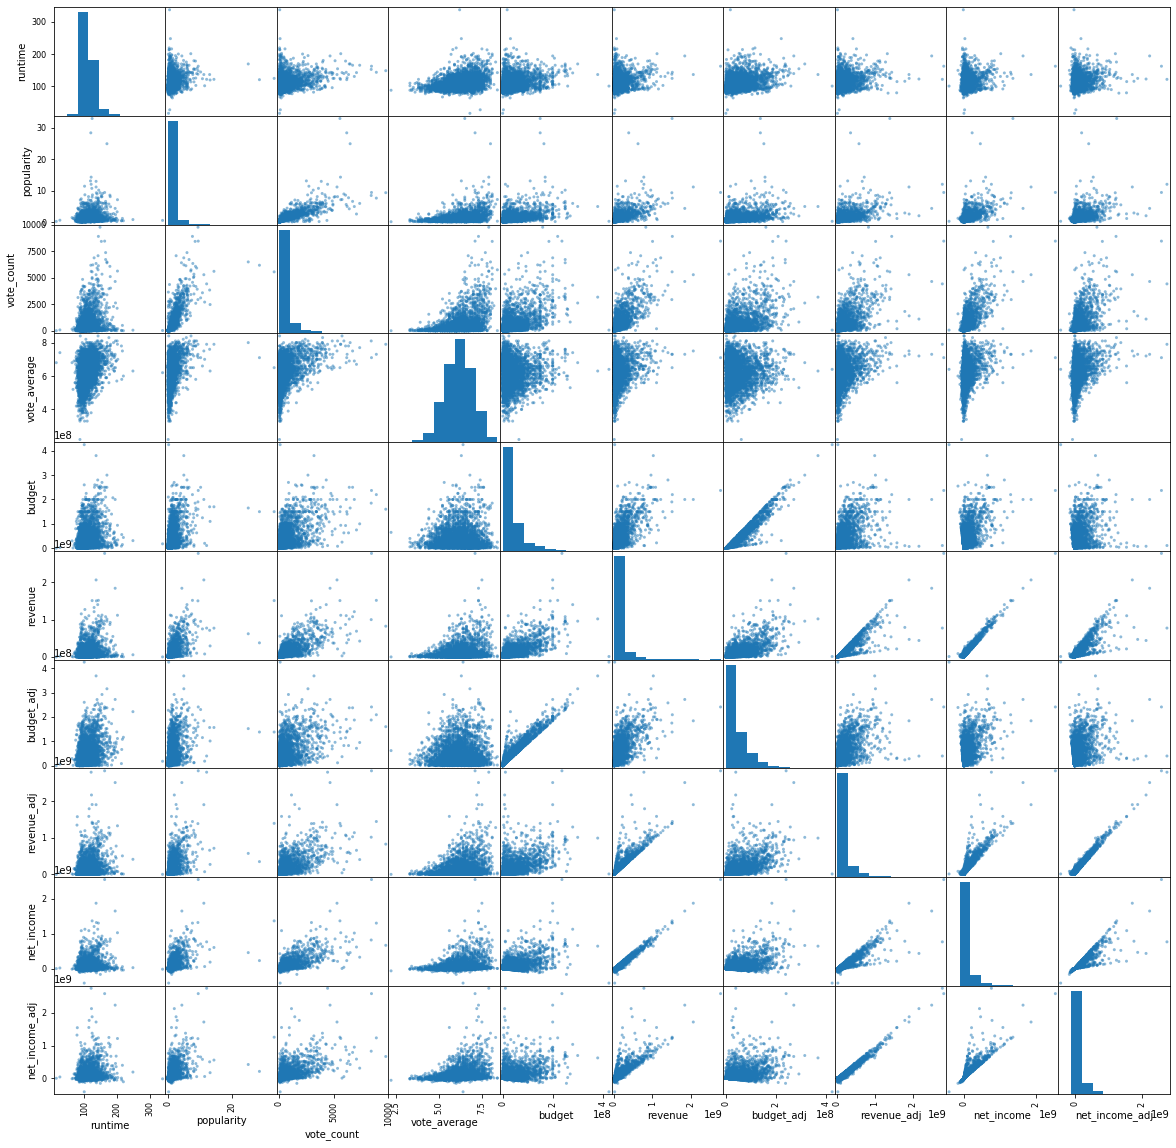

In [24]:
pd.plotting.scatter_matrix(df_new,figsize=(20,20));

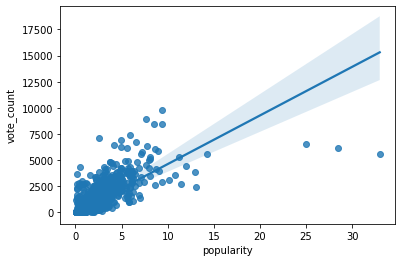

In [25]:
sns.regplot(x="popularity", y="vote_count", data=df_new);

#### Comment: As shown, this indicates a positive correlation between these two variables. popularity has impact on vote_count. 

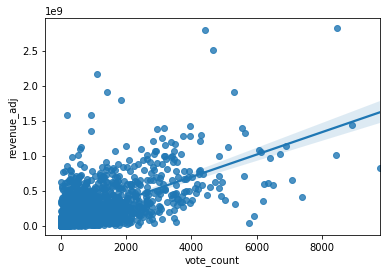

In [26]:
sns.regplot(x="vote_count", y="revenue_adj", data=df_new);

#### Comment: As shown, this indicates a positive correlation between these two variables. vote_count has impact on revenue. this mean votes could potentially be a predictor of revenues.

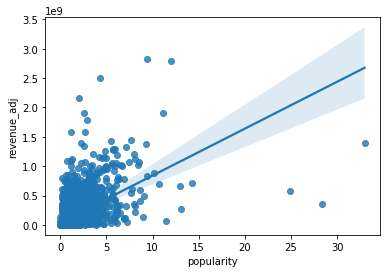

In [27]:
sns.regplot(x="popularity", y="revenue_adj", data=df_new);

#### Comment: As shown, this indicates a positive correlation between these two variables. popularity has impact on revenue.

## Communicating Results

In [28]:
def year_prop(df_new,Property):
    '''
    Description:
    this function will return a new data frame contains movies/genres/.. that have the highest given property from year to year
    property must be one of these list: ['runtime','popularity','vote_count','vote_average','budget','revenue','budget_adj',
    'revenue_adj','net_income','net_income_adj']
    Hint: property must be in string format
    also the modified data frame will be given
    '''
    #Empty DataFrame:
    x = pd.DataFrame(columns=df_new.columns)
    years = sorted(df_new['release_year'].unique())
    
    for i in years:
        y = df_new[df_new['release_year'] == i ]
        x = x.append(y[y[Property] == y[Property].max()])
      
    return x

In [29]:
def plot_barh(x_locations,x_heights,bar_width,font1,font2,title,h_title,v_title):
    '''
    Description:
    this function will plot horizontal bars, on y-axis the chosen object and on x-axis the chosen property
    for example: x_locations = x['movie_year']
            x_heights = x['popularity']
    hint: plt.xticks(fontsize=font1);
          plt.yticks(fontsize=font1);
          plt.title(title,fontsize=font2)
          plt.xlabel(h_title,fontsize=font2) 
          plt.ylabel(v_title,fontsize=font2);
    '''
    plt.subplots(figsize=(15,20))
    plt.barh(x_locations,x_heights,height=bar_width);
    plt.xticks(fontsize=font1);
    plt.yticks(fontsize=font1);
    plt.title(title,fontsize=font2)
    plt.xlabel(h_title,fontsize=font2) 
    plt.ylabel(v_title,fontsize=font2);

### Which genres are most popular from year to year?

In [30]:
x = year_prop(df_new,'popularity')
x.head(5)

original_title release_year  \
3593                          Psycho         1960   
3583  One Hundred and One Dalmatians         1961   
3504                          Dr. No         1962   
3698           From Russia With Love         1963   
3511                      Goldfinger         1964   

                                                   cast  \
3593  Anthony Perkins|Vera Miles|John Gavin|Janet Le...   
3583  Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...   
3504  Sean Connery|Ursula Andress|Joseph Wiseman|Jac...   
3698  Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...   
3511  Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...   

                                               director  \
3593                                   Alfred Hitchcock   
3583  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman   
3504                                      Terence Young   
3698                                      Terence Young   
3511                                       Guy Hamilton   

                                 genres  \
3593              Drama|Horror|Thriller   
3583  Adventure|Animation|Comedy|Family   
3504          Adventure|Action|Thriller   
3698          Action|Thriller|Adventure   
3511          Adventure|Action|Thriller   

                                  production_companies runtime  popularity  \
3593                               Shamley Productions     109    2.610362   
3583                           Walt Disney Productions      79    2.631987   
3504         Eon Productions|Metro-Goldwyn-Mayer (MGM)     110    3.170651   
3698  Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq     115    2.508235   
3511         Eon Productions|Metro-Goldwyn-Mayer (MGM)     110    3.153791   

     vote_count  vote_average   budget    revenue    budget_adj   revenue_adj  \
3593       1180           8.0   806948   32000000  5.949601e+06  2.359350e+08   
3583        913           6.6  4000000  215880014  2.917944e+07  1.574815e+09   
3504        560           6.7  1100000   59600000  7.929294e+06  4.296236e+08   
3698        458           6.7  2500000   78898765  1.780045e+07  5.617734e+08   
3511        602           7.0  3500000  124900000  2.460594e+07  8.780804e+08   

     net_income  net_income_adj                            movie_year  
3593   31193052    2.299854e+08                          Psycho(1960)  
3583  211880014    1.545635e+09  One Hundred and One Dalmatians(1961)  
3504   58500000    4.216943e+08                          Dr. No(1962)  
3698   76398765    5.439729e+08           From Russia With Love(1963)  
3511  121400000    8.534745e+08                      Goldfinger(1964)

In [31]:
x.shape

(56, 17)

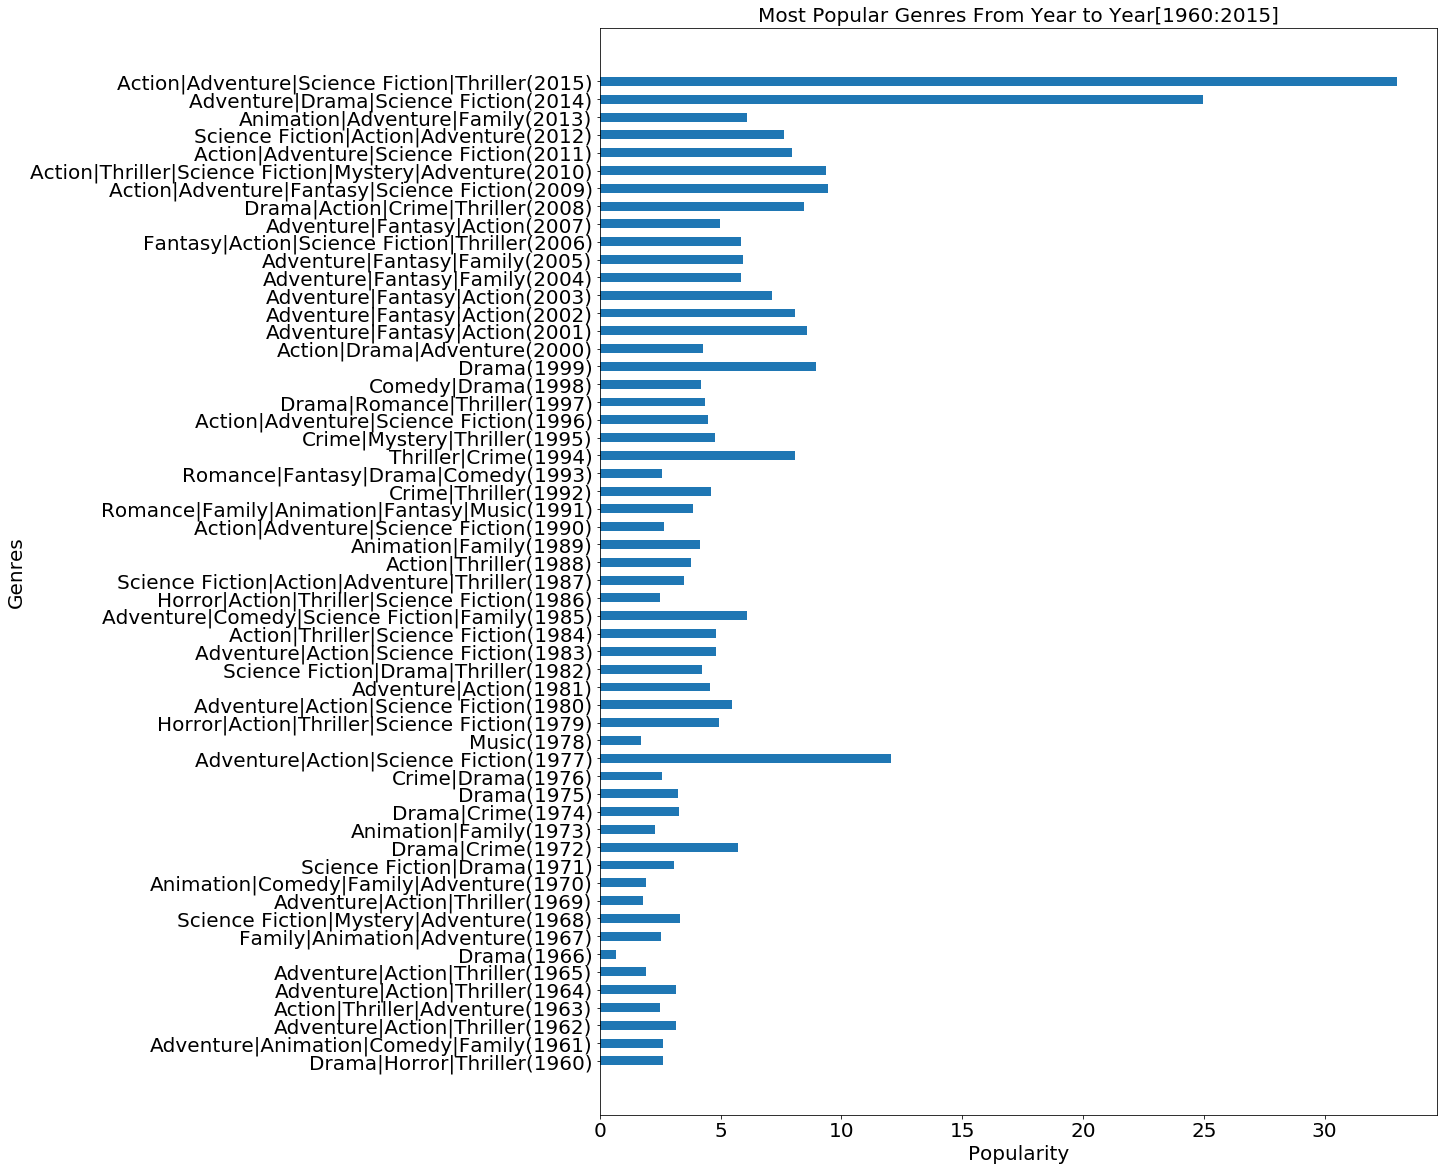

In [32]:
title = 'Most Popular Genres From Year to Year[1960:2015]'
h_title = 'Popularity'
v_title = 'Genres'
x['genres_year'] = x['genres'] +'('+ x['release_year']+')'
plot_barh(x['genres_year'],x['popularity'],0.5,20,20,title,h_title,v_title)

### Which Movie is most popular from year to year?

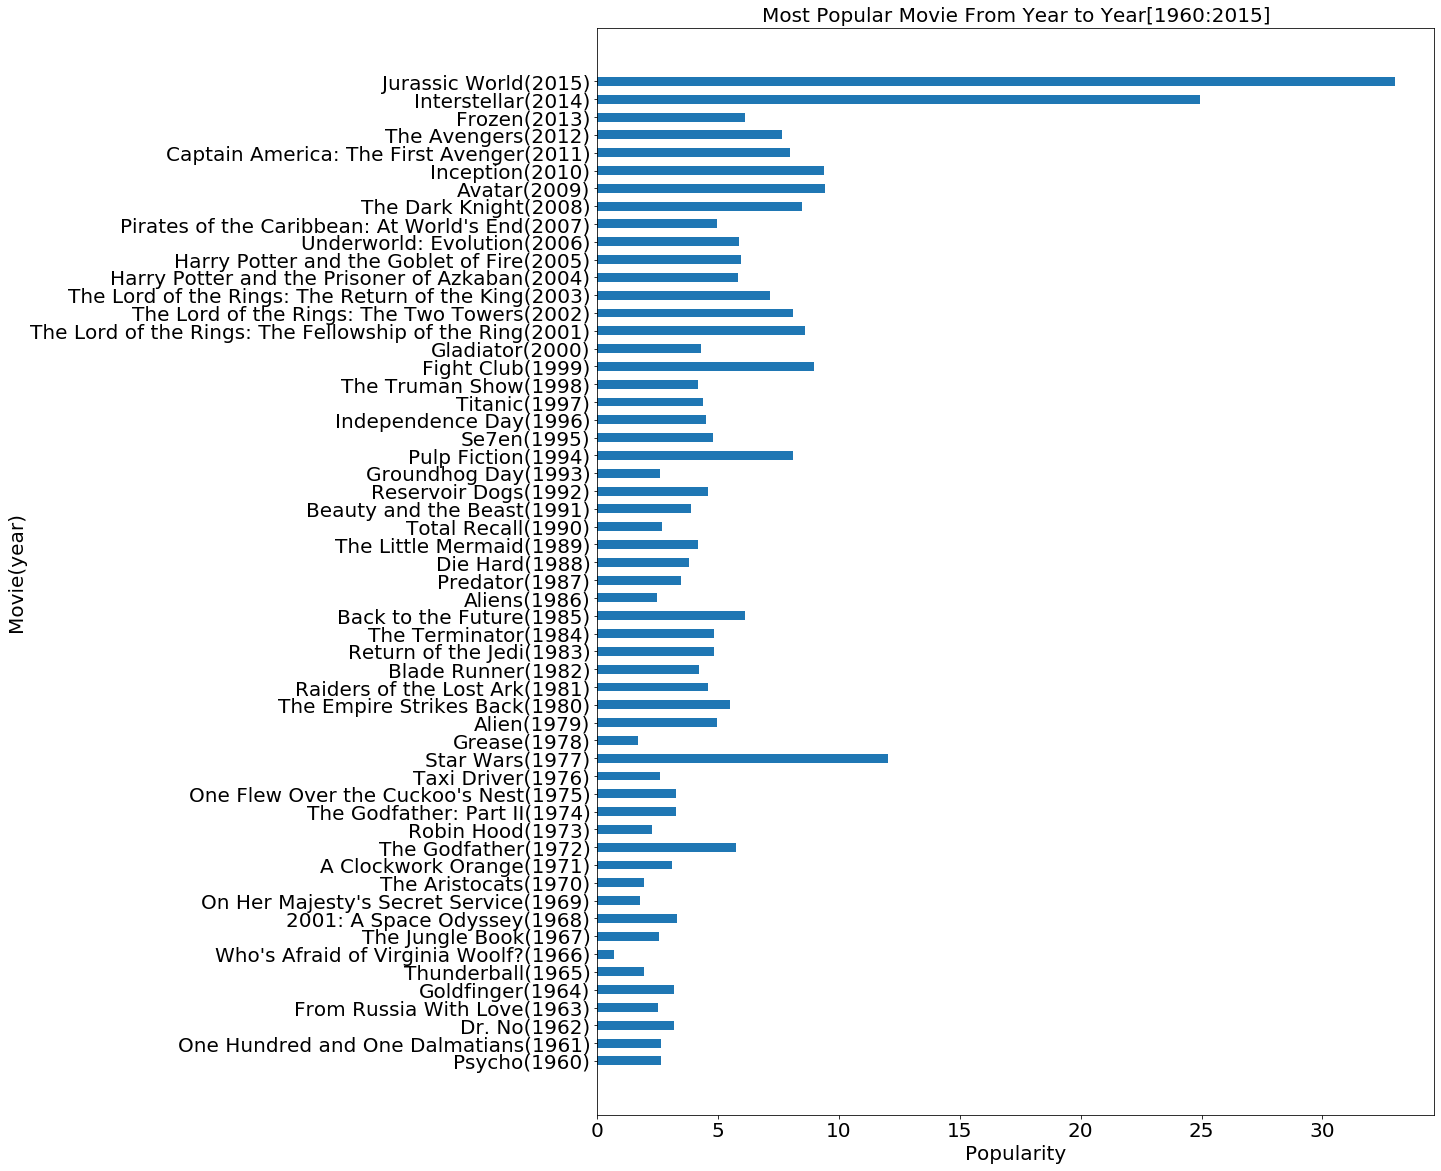

In [33]:
title = 'Most Popular Movie From Year to Year[1960:2015]'
h_title = 'Popularity'
v_title = 'Movie(year)'
plot_barh(x['movie_year'],x['popularity'],0.5,20,20,title,h_title,v_title)

### Which Movie is most voted from year to year?

In [34]:
x = year_prop(df_new,'vote_average')
x.head(5)

original_title release_year  \
3593                 Psycho         1960   
3591        One, Two, Three         1961   
3506  To Kill a Mockingbird         1962   
3700                Charade         1963   
3702       The Great Escape         1963   

                                                   cast          director  \
3593  Anthony Perkins|Vera Miles|John Gavin|Janet Le...  Alfred Hitchcock   
3591  James Cagney|Liselotte Pulver|Horst Buchholz|P...      Billy Wilder   
3506  Gregory Peck|John Megna|Frank Overton|Rosemary...   Robert Mulligan   
3700  Cary Grant|Audrey Hepburn|Walter Matthau|James...     Stanley Donen   
3702  Steve McQueen|James Garner|Richard Attenboroug...      John Sturges   

                                    genres     production_companies runtime  \
3593                 Drama|Horror|Thriller      Shamley Productions     109   
3591                         Comedy|Family  The Mirisch Corporation     115   
3506                           Crime|Drama       Universal Pictures     129   
3700       Comedy|Mystery|Romance|Thriller       Universal Pictures     113   
3702  Adventure|Drama|History|Thriller|War  The Mirisch Corporation     172   

      popularity vote_count  vote_average   budget   revenue    budget_adj  \
3593    2.610362       1180           8.0   806948  32000000  5.949601e+06   
3591    0.303783         30           7.5  3000000   4000000  2.188458e+07   
3506    0.810805        317           7.7  2000000  13129846  1.441690e+07   
3700    0.920094        187           7.5  4000000  13474588  2.848072e+07   
3702    0.664326        409           7.5  4000000   5000000  2.848072e+07   

       revenue_adj net_income  net_income_adj                   movie_year  
3593  2.359350e+08   31193052    2.299854e+08                 Psycho(1960)  
3591  2.917944e+07    1000000    7.294861e+06        One, Two, Three(1961)  
3506  9.464582e+07   11129846    8.022893e+07  To Kill a Mockingbird(1962)  
3700  9.594148e+07    9474588    6.746077e+07                Charade(1963)  
3702  3.560090e+07    1000000    7.120179e+06       The Great Escape(1963)

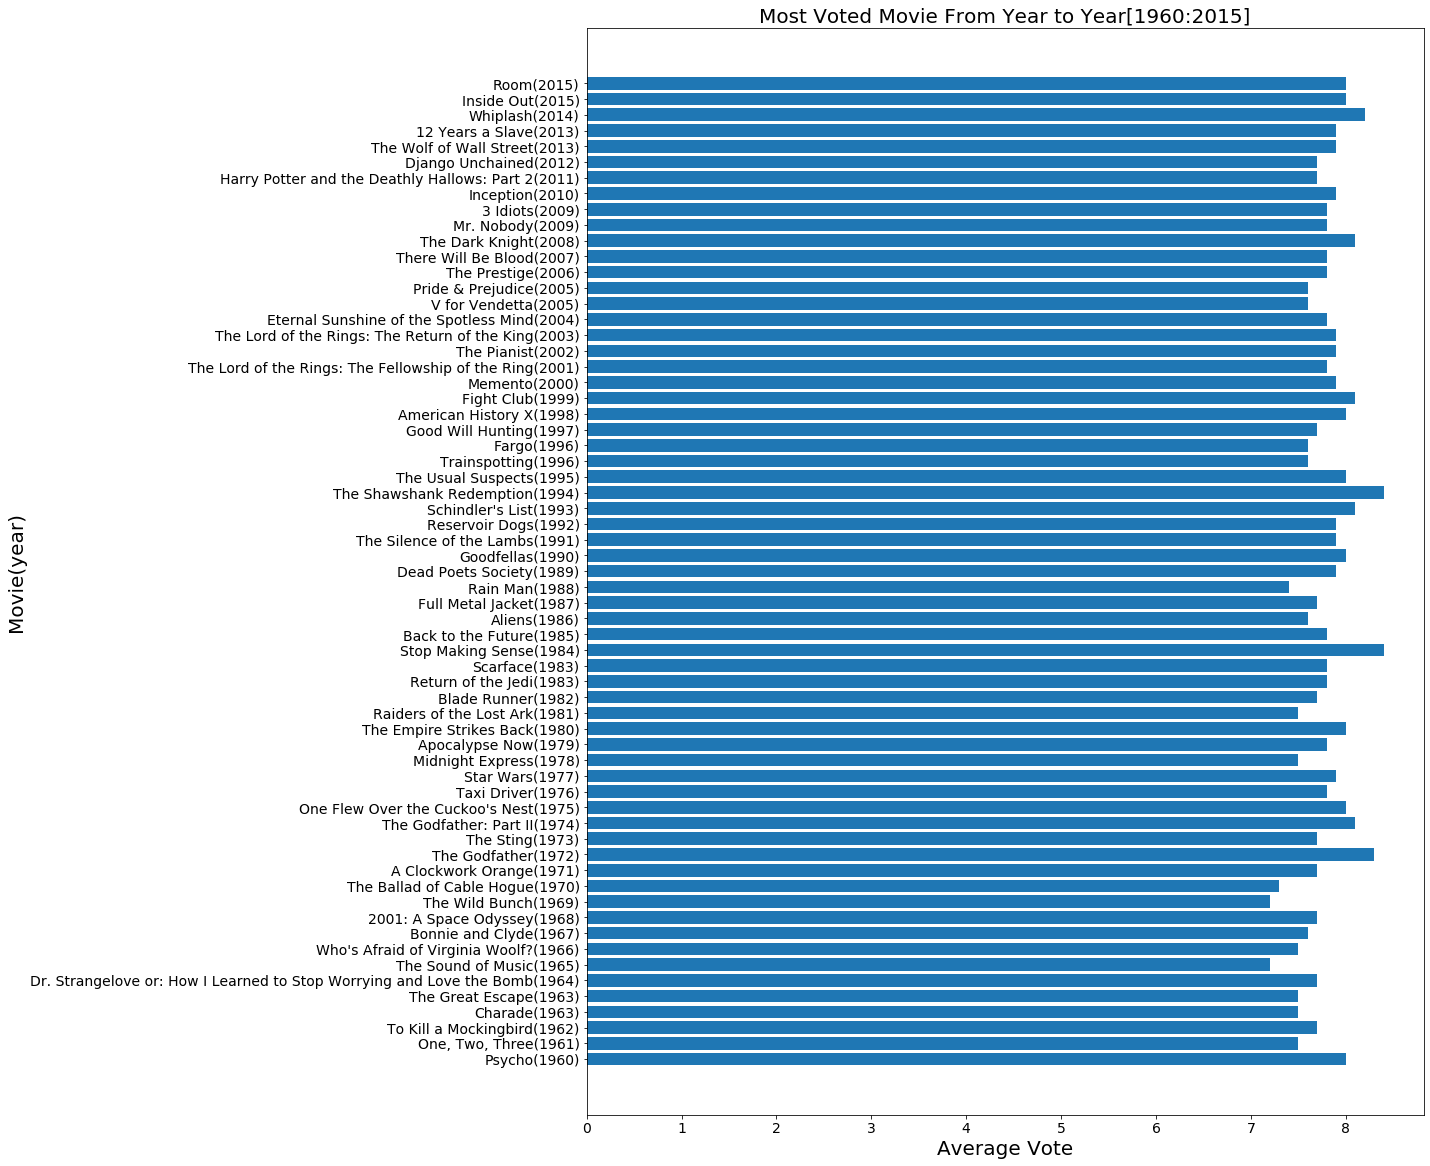

In [35]:
title = 'Most Voted Movie From Year to Year[1960:2015]'
h_title = 'Average Vote'
v_title = 'Movie(year)'
plot_barh(x['movie_year'],x['vote_average'],0.8,14,20,title,h_title,v_title)

### Which Movie is most profitable from year to year?

In [36]:
x = year_prop(df_new,'net_income_adj')
x.head(5)

original_title release_year  \
3595                       Spartacus         1960   
3583  One Hundred and One Dalmatians         1961   
3504                          Dr. No         1962   
3698           From Russia With Love         1963   
3511                      Goldfinger         1964   

                                                   cast  \
3595  Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...   
3583  Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...   
3504  Sean Connery|Ursula Andress|Joseph Wiseman|Jac...   
3698  Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...   
3511  Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...   

                                               director  \
3595                                    Stanley Kubrick   
3583  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman   
3504                                      Terence Young   
3698                                      Terence Young   
3511                                       Guy Hamilton   

                                 genres  \
3595               Action|Drama|History   
3583  Adventure|Animation|Comedy|Family   
3504          Adventure|Action|Thriller   
3698          Action|Thriller|Adventure   
3511          Adventure|Action|Thriller   

                                  production_companies runtime  popularity  \
3595                                 Bryna Productions     197    1.136943   
3583                           Walt Disney Productions      79    2.631987   
3504         Eon Productions|Metro-Goldwyn-Mayer (MGM)     110    3.170651   
3698  Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq     115    2.508235   
3511         Eon Productions|Metro-Goldwyn-Mayer (MGM)     110    3.153791   

     vote_count  vote_average    budget    revenue    budget_adj  \
3595        211           6.9  12000000   60000000  8.847561e+07   
3583        913           6.6   4000000  215880014  2.917944e+07   
3504        560           6.7   1100000   59600000  7.929294e+06   
3698        458           6.7   2500000   78898765  1.780045e+07   
3511        602           7.0   3500000  124900000  2.460594e+07   

       revenue_adj net_income  net_income_adj  \
3595  4.423780e+08   48000000    3.539024e+08   
3583  1.574815e+09  211880014    1.545635e+09   
3504  4.296236e+08   58500000    4.216943e+08   
3698  5.617734e+08   76398765    5.439729e+08   
3511  8.780804e+08  121400000    8.534745e+08   

                                movie_year  
3595                       Spartacus(1960)  
3583  One Hundred and One Dalmatians(1961)  
3504                          Dr. No(1962)  
3698           From Russia With Love(1963)  
3511                      Goldfinger(1964)

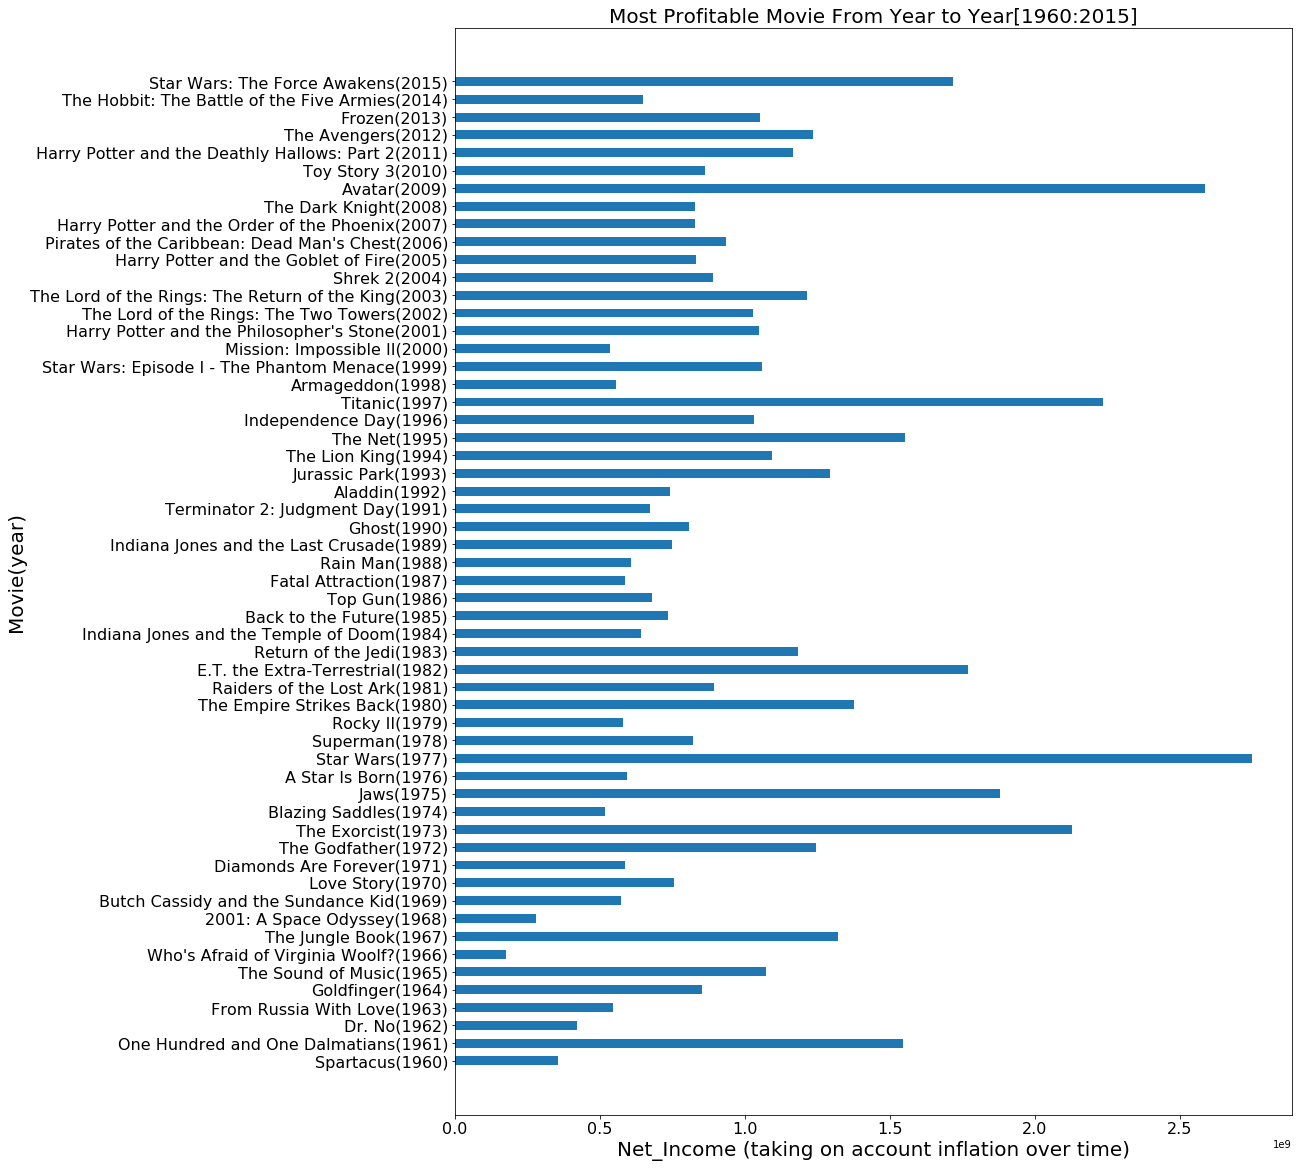

In [37]:
title = 'Most Profitable Movie From Year to Year[1960:2015]'
h_title = 'Net_Income (taking on account inflation over time)'
v_title = 'Movie(year)'
plot_barh(x['movie_year'],x['net_income_adj'],0.5,16,20,title,h_title,v_title)

### Which Movie is most runtime from year to year?

In [38]:
x = year_prop(df_new,'runtime')
x.head(5)

original_title release_year  \
3595              Spartacus         1960   
3587  Judgment at Nuremberg         1961   
3505     Lawrence of Arabia         1962   
3701              Cleopatra         1963   
3516           My Fair Lady         1964   

                                                   cast  \
3595  Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...   
3587  Spencer Tracy|Burt Lancaster|Richard Widmark|M...   
3505  Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...   
3701  Elizabeth Taylor|Richard Burton|Rex Harrison|R...   
3516  Audrey Hepburn|Rex Harrison|Stanley Holloway|W...   

                                               director  \
3595                                    Stanley Kubrick   
3587                                     Stanley Kramer   
3505                                         David Lean   
3701  Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...   
3516                                       George Cukor   

                           genres  \
3595         Action|Drama|History   
3587                Drama|History   
3505  Adventure|Drama|History|War   
3701        Drama|History|Romance   
3516   Drama|Family|Music|Romance   

                                   production_companies runtime  popularity  \
3595                                  Bryna Productions     197    1.136943   
3587                        United Artists|Roxlom Films     186    0.538364   
3505                              Horizon Pictures (II)     216    1.168767   
3701  Twentieth Century Fox Film Corporation|MCL Fil...     248    0.804533   
3516                                       Warner Bros.     170    0.633882   

     vote_count  vote_average    budget   revenue    budget_adj   revenue_adj  \
3595        211           6.9  12000000  60000000  8.847561e+07  4.423780e+08   
3587         67           6.7   3000000  10000000  2.188458e+07  7.294861e+07   
3505        517           7.5  15000000  70000000  1.081267e+08  5.045914e+08   
3701         68           6.3  31115000  57750000  2.215444e+08  4.111904e+08   
3516        184           7.1  17000000  72000000  1.195145e+08  5.061793e+08   

     net_income  net_income_adj                   movie_year  
3595   48000000    3.539024e+08              Spartacus(1960)  
3587    7000000    5.106403e+07  Judgment at Nuremberg(1961)  
3505   55000000    3.964647e+08     Lawrence of Arabia(1962)  
3701   26635000    1.896460e+08              Cleopatra(1963)  
3516   55000000    3.866647e+08           My Fair Lady(1964)

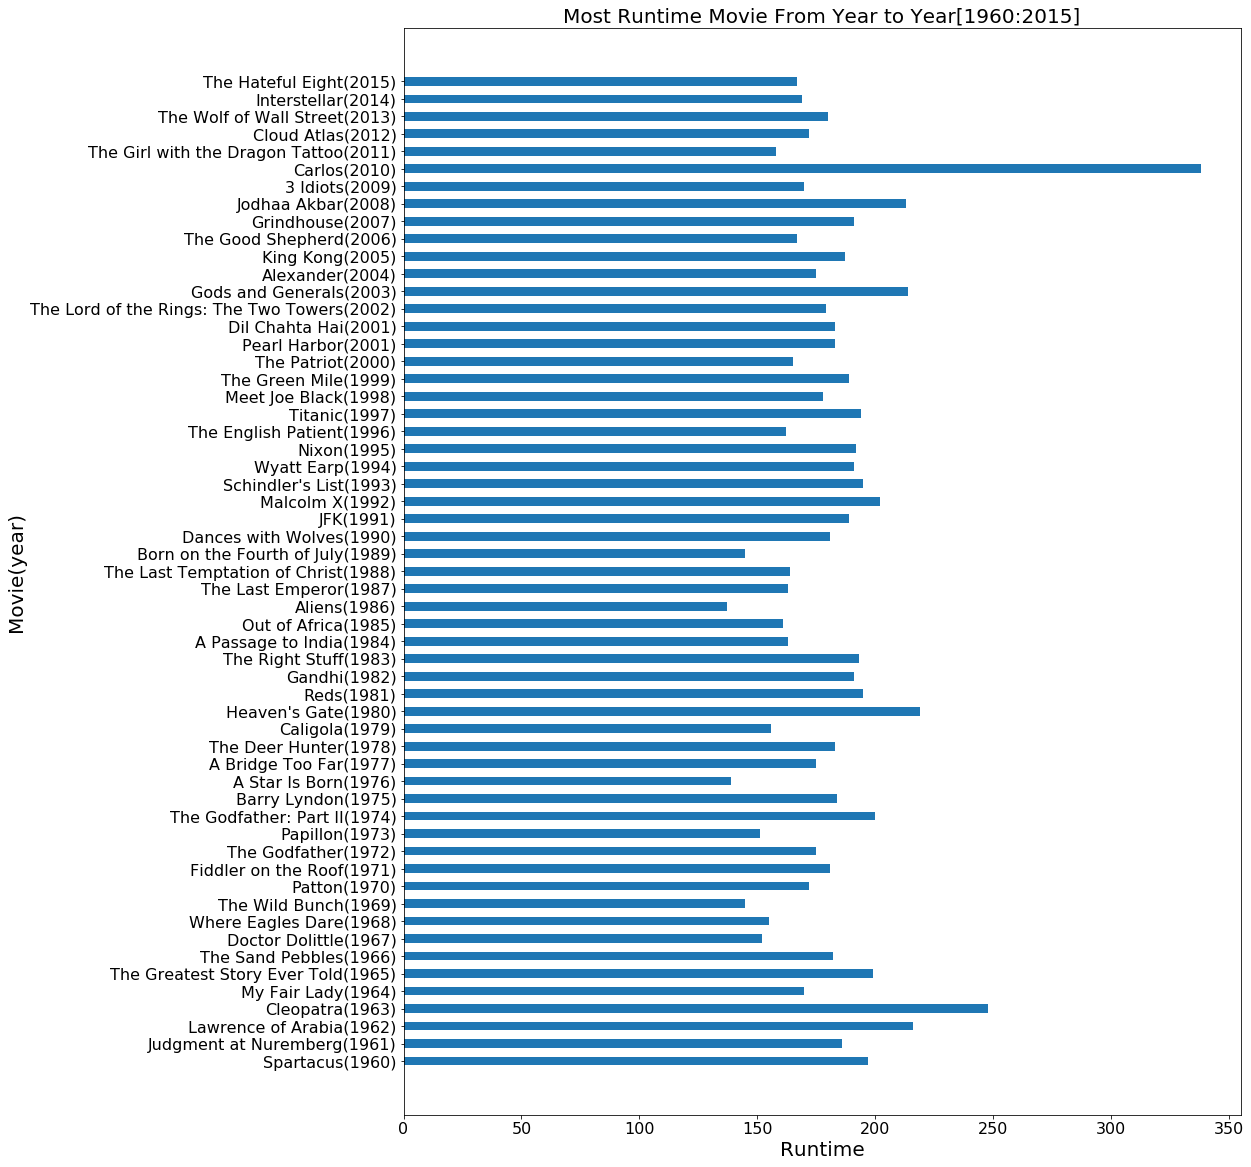

In [39]:
title = 'Most Runtime Movie From Year to Year[1960:2015]'
h_title = 'Runtime'
v_title = 'Movie(year)'
plot_barh(x['movie_year'],x['runtime'],0.5,16,20,title,h_title,v_title)

In [40]:
def splited_DataFrame(df_new,Object):
    '''
    Description:
    this function will split the given object that contains ('|') into sub-objects and return a new dataframe with the new
    sub-objects instead of the main object
    size of the new dataframe is bigger than the given data frame
    objects that contain ('|'):['cast','genres','production_companies']
    
    '''
    x = pd.DataFrame(columns=df_new.columns)
    
    #hb = df_new[df_new['production_companies'].str.contains(" | ")]

    new = df_new[Object].str.split('|',expand=True)

    df1 = df_new.copy()
    df2 = df_new.copy()
    df3 = df_new.copy()
    df4 = df_new.copy()
    df5 = df_new.copy()

    df1[Object] = new[0]
    df2[Object] = new[1]
    df3[Object] = new[2]
    df4[Object] = new[3]
    df5[Object] = new[4]

    new_rows = df1.append([df2,df3,df4,df5])
    x = x.append(new_rows,ignore_index=True)
    x.dropna(inplace=True)
    return x 

### Which top 10 production companies are most involved in produce movies of alltimes ?

In [41]:
x = splited_DataFrame(df_new,'production_companies')
top10_production_companies = x['production_companies'].value_counts().to_frame()
top10_production_companies.rename(columns={'production_companies':'Movies'},inplace=True)
top10_production_companies.index.name = 'top10_production_companies'
top10_production_companies.nlargest(n=10,columns='Movies')

Movies
top10_production_companies                    
Universal Pictures                         329
Warner Bros.                               324
Paramount Pictures                         270
Twentieth Century Fox Film Corporation     201
Columbia Pictures                          178
New Line Cinema                            152
Walt Disney Pictures                       117
Touchstone Pictures                        116
Metro-Goldwyn-Mayer (MGM)                  109
Relativity Media                           102

### Which top 10 production companies are least involved in produce movies  of alltimes ?

In [42]:
top10_production_companies.nsmallest(n=10,columns='Movies')

Movies
top10_production_companies        
Alfran Productions               1
Imperial Entertainment           1
Deuce Three Productions          1
Two Flints                       1
HSX Films                        1
Sunday Night                     1
Item 7                           1
Chartoff Productions             1
Mirisch Films                    1
Caviar Films                     1

### Which top 10 most genres of alltimes ?

In [43]:
x = splited_DataFrame(df_new,'genres')
top10_most_genre_overall = x['genres'].value_counts().to_frame()
top10_most_genre_overall.rename(columns={'genres':'value_counts'},inplace=True)
top10_most_genre_overall.index.name = 'top10_most_genre'
top10_most_genre_overall.nlargest(n=10,columns='value_counts')

value_counts
top10_most_genre              
Drama                     1729
Comedy                    1335
Thriller                  1194
Action                    1076
Adventure                  743
Romance                    658
Crime                      649
Science Fiction            517
Horror                     459
Family                     417

### Which top 10 least genres of alltimes ?

In [44]:
top10_most_genre_overall.nsmallest(n=10,columns='value_counts')

value_counts
top10_most_genre              
TV Movie                     1
Foreign                      9
Documentary                 26
Western                     52
War                        119
History                    128
Music                      131
Animation                  199
Mystery                    343
Fantasy                    395

### What are the top 20 Actors/Actresses who have participated in films at all times?

In [45]:
x = splited_DataFrame(df_new,'cast')
top20_most_actor_actress = x['cast'].value_counts().to_frame()
top20_most_actor_actress.rename(columns={'cast':'Movies'},inplace=True)
top20_most_actor_actress.index.name = 'Actor/Actress'
top20_most_actor_actress.nlargest(n=20,columns='Movies')

Movies
Actor/Actress             
Robert De Niro          52
Bruce Willis            46
Samuel L. Jackson       44
Nicolas Cage            43
Matt Damon              36
Johnny Depp             35
Tom Hanks               34
Morgan Freeman          34
Harrison Ford           34
Brad Pitt               34
Sylvester Stallone      34
Tom Cruise              33
Denzel Washington       32
Eddie Murphy            32
Liam Neeson             31
Julianne Moore          30
Owen Wilson             30
Gene Hackman            29
Mark Wahlberg           29
Willem Dafoe            29

 ### Which top 20 Actors/Atresses are least participated in movies of alltimes ?

In [46]:
top20_most_actor_actress.nsmallest(n=20,columns='Movies')

Movies
Actor/Actress           
Amber Armstrong        1
Matt Bomer             1
Raad Rawi              1
Neha Dhupia            1
Serge Riaboukine       1
Summer Phoenix         1
Enrique Murciano       1
Wade Williams          1
Caroline Munro         1
Laura Harris           1
Flint Beverage         1
Richard Durden         1
Arsher Ali             1
Tiffany Bolling        1
Heike Makatsch         1
Rocky Carroll          1
Chris Lowell           1
Phylicia RashÄd        1
Barney Clark           1
Haley Webb             1

 ### Which top 10 Directors who directed movies of alltimes ?

In [47]:
top10_most_director = df_new['director'].value_counts().to_frame()
top10_most_director.rename(columns={'director':'Movies'},inplace=True)
top10_most_director.index.name = 'Director'
top10_most_director.nlargest(n=10,columns='Movies')

Movies
Director                 
Steven Spielberg       27
Clint Eastwood         24
Ridley Scott           21
Woody Allen            18
Steven Soderbergh      17
Martin Scorsese        17
Tim Burton             16
Brian De Palma         15
Robert Zemeckis        15
Renny Harlin           15

### Which top 10 movies are most profitable of alltimes ?
### Hint: most profitable compare to popularity, average vote, budget  

In [48]:
top10_movies_most_profitable_alltimes = df_new.nlargest(n=10,columns=['net_income_adj','net_income'])
top10_movies_most_profitable_alltimes[['movie_year','director','popularity','vote_average',\
                                       'budget_adj','budget','net_income_adj','net_income']]

movie_year  \
325                        Star Wars(1977)   
344                           Avatar(2009)   
1746                         Titanic(1997)   
3752                    The Exorcist(1973)   
3496                            Jaws(1975)   
3155      E.T. the Extra-Terrestrial(1982)   
3       Star Wars: The Force Awakens(2015)   
2828                         The Net(1995)   
3583  One Hundred and One Dalmatians(1961)   
2533         The Empire Strikes Back(1980)   

                                               director  popularity  \
325                                        George Lucas   12.037933   
344                                       James Cameron    9.432768   
1746                                      James Cameron    4.355219   
3752                                   William Friedkin    2.010733   
3496                                   Steven Spielberg    2.563191   
3155                                   Steven Spielberg    2.900556   
3                                           J.J. Abrams   11.173104   
2828                                      Irwin Winkler    1.136610   
3583  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    2.631987   
2533                                     Irvin Kershner    5.488441   

      vote_average    budget_adj     budget  net_income_adj  net_income  
325            7.9  3.957559e+07   11000000    2.750137e+09   764398007  
344            7.1  2.408869e+08  237000000    2.586237e+09  2544505847  
1746           7.3  2.716921e+08  200000000    2.234714e+09  1645034188  
3752           7.2  3.928928e+07    8000000    2.128036e+09   433306145  
3496           7.3  2.836275e+07    7000000    1.878643e+09   463654000  
3155           7.2  2.372625e+07   10500000    1.767968e+09   782410554  
3              7.5  1.839999e+08  200000000    1.718723e+09  1868178225  
2828           5.6  3.148127e+07   22000000    1.551568e+09  1084279658  
3583           6.6  2.917944e+07    4000000    1.545635e+09   211880014  
2533           8.0  4.762866e+07   18000000    1.376998e+09   520400000

### Which top 10 movies are least profitable of alltimes ?
### Hint: least profitable compare to popularity, average vote, budget  

In [49]:
top10_movies_least_profitable_alltimes = df_new.nsmallest(n=10,columns=['net_income_adj','net_income'])
top10_movies_least_profitable_alltimes[['movie_year','popularity','vote_average',\
                                        'budget_adj','budget','net_income_adj','net_income']]

movie_year  popularity  vote_average  \
678              The Warrior's Way(2010)    0.250540           6.4   
1910               The Lone Ranger(2013)    1.214510           6.0   
2445                     The Alamo(2004)    0.948560           5.9   
716               The 13th Warrior(1999)    1.189386           6.2   
1646                  Brother Bear(2003)    1.653031           6.8   
2834              Cutthroat Island(1995)    0.981049           6.1   
1391  The Adventures of Pluto Nash(2002)    0.912373           4.6   
1182               Mars Needs Moms(2011)    0.921653           5.5   
2547                 Heaven's Gate(1980)    0.418950           6.0   
3127                     Supernova(2000)    0.385350           4.7   

        budget_adj     budget  net_income_adj  net_income  
678   4.250000e+08  425000000   -4.139124e+08  -413912431  
1910  2.386885e+08  255000000   -1.551102e+08  -165710090  
2445  1.673946e+08  145000000   -1.375868e+08  -119180039  
716   2.094485e+08  160000000   -1.286813e+08   -98301101  
1646  1.185353e+08  100000000   -1.185350e+08   -99999750  
2834  1.402348e+08   98000000   -1.137371e+08   -79482678  
1391  1.212261e+08  100000000   -1.126143e+08   -92896027  
1182  1.454097e+08  150000000   -1.076102e+08  -111007242  
2547  1.164256e+08   44000000   -1.072059e+08   -40515669  
3127  1.139663e+08   90000000   -9.518961e+07   -75171919

### Which top 10 movies have largest budget of alltimes ?
### Hint: largest budget compare to popularity, average vote, net-income  

In [50]:
top10_movies_most_budget_alltimes = df_new.nlargest(n=10,columns=['budget_adj','budget'])
top10_movies_most_budget_alltimes[['movie_year','popularity','vote_average',\
                                   'budget_adj','budget','net_income_adj','net_income']]

movie_year  popularity  \
678                             The Warrior's Way(2010)    0.250540   
1089  Pirates of the Caribbean: On Stranger Tides(2011)    4.955130   
2556     Pirates of the Caribbean: At World's End(2007)    4.965391   
2230                             Superman Returns(2006)    1.957331   
1746                                      Titanic(1997)    4.355219   
2563                                 Spider-Man 3(2007)    2.520912   
524                                       Tangled(2010)    2.865684   
14                        Avengers: Age of Ultron(2015)    5.944927   
347        Harry Potter and the Half-Blood Prince(2009)    5.076472   
2824                                   Waterworld(1995)    1.232098   

      vote_average    budget_adj     budget  net_income_adj  net_income  
678            6.4  4.250000e+08  425000000   -4.139124e+08  -413912431  
1089           6.3  3.683713e+08  380000000    6.220462e+08   641683000  
2556           6.8  3.155006e+08  300000000    6.951529e+08   661000000  
2230           5.3  2.920507e+08  270000000    1.309698e+08   121081192  
1746           7.3  2.716921e+08  200000000    2.234714e+09  1645034188  
2563           5.8  2.713305e+08  258000000    6.655712e+08   632871626  
524            7.3  2.600000e+08  260000000    3.317949e+08   331794936  
14             7.4  2.575999e+08  280000000    1.035032e+09  1125035767  
347            7.3  2.541001e+08  250000000    6.951764e+08   683959197  
2824           5.8  2.504192e+08  175000000    1.276683e+08    89218220

### Which top 10 movies have smallest budget of alltimes ?
### Hint: smallest budget compare to popularity, average vote, net-income  

In [51]:
top10_movies_least_budget_alltimes = df_new.nsmallest(n=40,columns=['budget','budget_adj'])
top10_movies_least_budget_alltimes[['movie_year','popularity','vote_average',\
                                    'budget_adj','budget','net_income_adj','net_income']]

movie_year  popularity  vote_average  \
1237                  Love, Wedding, Marriage(2011)    0.520430           5.3   
805                              Lost & Found(1999)    0.090186           4.8   
3178                             Death Wish 2(1982)    0.464188           5.6   
690                                       Boy(2010)    0.028456           7.3   
3571       Tales from the Darkside: The Movie(1990)    0.317091           5.8   
2882                      Tales from the Hood(1995)    0.105894           5.1   
2850                             The Prophecy(1995)    0.705828           5.5   
3662       National Lampoon's Loaded Weapon 1(1993)    0.490013           5.5   
2006                             Hross Ã­ oss(2013)    0.222776           6.5   
1737                              Kid's Story(2003)    0.208637           6.8   
3793                                 F.I.S.T.(1978)    0.439210           6.7   
1999                           Make Your Move(2013)    0.296763           5.9   
3628         Teenage Mutant Ninja Turtles III(1993)    1.024955           5.2   
1612                             Joyful Noise(2012)    0.316117           6.7   
772                            Angela's Ashes(1999)    0.352060           7.0   
3544                 The Hunt for Red October(1990)    1.072912           6.9   
1333                     The Sum of All Fears(2002)    0.958182           5.7   
503                                    Wanted(2009)    0.278387           4.9   
1246                       From Prada to Nada(2011)    0.463510           5.2   
3721                  The Karate Kid, Part II(1986)    0.772494           5.8   
2053                           Into the Night(1985)    0.132713           6.1   
2457                                   Primer(2004)    0.856329           6.9   
1273                                  Weekend(2011)    0.243777           7.4   
337                                Eraserhead(1977)    0.331417           7.1   
2529                           Pink Flamingos(1972)    0.412913           6.3   
2611                      Paranormal Activity(2007)    1.120442           6.1   
1276                               Bellflower(2011)    0.195283           6.7   
729                   The Blair Witch Project(1999)    0.934621           6.3   
1420                                   Clerks(1994)    1.297355           7.2   
669                                   Catfish(2010)    0.346071           6.4   
674                                      Howl(2010)    0.275607           6.8   
1406             The Kid Stays in the Picture(2002)    0.017708           7.4   
1279                            Life in a Day(2011)    0.181427           7.3   
3213                                       Pi(1998)    1.011829           6.9   
2513                            Super Size Me(2004)    0.263897           6.5   
2507  The Heart is Deceitful Above All Things(2004)    0.286541           5.6   
2381                        The Foot Fist Way(2006)    0.139931           5.3   
3486             The Texas Chain Saw Massacre(1974)    0.906087           6.8   
146                               The Gallows(2015)    0.532205           5.0   
1984                           Upstream Color(2013)    0.476673           6.5   

         budget_adj  budget  net_income_adj  net_income  
1237       0.969398       1    1.334861e+03        1377  
805        1.309053       1    1.295962e+02          99  
3178       4.519285       2    3.163499e+01          14  
690        3.000000       3    4.000000e+01          40  
3571       5.006696       3    2.169568e+01          13  
2882       8.585801       6    7.154834e+00           5  
2850      11.447735       8    1.144773e+01           8  
3662      12.075760       8    2.867993e+01          19  
2006       9.360334      10    9.360334e-01           1  
1737      11.853526      10   -5.926763e+00          -5  
3793      36.769708      11    0.000000e+00           0  
1999      14.040500    

#### Comment: we choose top 40 as first 20 are irrational values compared to reset of budget values

### Which top 10 movies are most voted of alltimes ?
### Hint: most voted compare to popularity, budget, net-income  

In [52]:
top10_movies_most_voted_alltimes = df_new.nlargest(n=10,columns=['vote_average','vote_count'])
top10_movies_most_voted_alltimes[['movie_year','director','popularity','vote_average',\
                                  'budget_adj','budget','net_income_adj','net_income']]

movie_year              director  popularity  \
1408  The Shawshank Redemption(1994)        Frank Darabont    7.192039   
2767         Stop Making Sense(1984)        Jonathan Demme    0.283191   
2525             The Godfather(1972)  Francis Ford Coppola    5.738034   
181                   Whiplash(2014)       Damien Chazelle    4.780419   
925            The Dark Knight(2008)     Christopher Nolan    8.466668   
691                 Fight Club(1999)         David Fincher    8.947905   
1407              Pulp Fiction(1994)     Quentin Tarantino    8.093754   
1409              Forrest Gump(1994)       Robert Zemeckis    6.715966   
3615          Schindler's List(1993)      Steven Spielberg    2.377288   
3482    The Godfather: Part II(1974)  Francis Ford Coppola    3.264571   

      vote_average    budget_adj     budget  net_income_adj  net_income  
1408           8.4  3.677779e+07   25000000    4.915674e+06     3341469  
2767           8.4  2.518850e+06    1200000    7.932116e+06     3778922  
2525           8.3  3.128737e+07    6000000    1.246626e+09   239066411  
181            8.2  3.039600e+06    3300000    9.849312e+06    10693093  
925            8.1  1.873655e+08  185000000    8.273675e+08   816921825  
691            8.1  8.247033e+07   63000000    4.955256e+07    37853753  
1407           8.1  1.176889e+07    8000000    3.029442e+08   205928762  
1409           8.1  8.091114e+07   55000000    9.164222e+08   622945399  
3615           8.1  3.320834e+07   22000000    4.517327e+08   299265768  
3482           8.1  5.748969e+07   13000000    1.527582e+08    34542841

### Which top 10 movies are least voted of alltimes ?
### Hint: least voted compare to popularity, budget, net-income  

In [53]:
top10_movies_least_voted_alltimes = df_new.nsmallest(n=10,columns=['vote_average','vote_count'])
top10_movies_least_voted_alltimes[['movie_year','popularity','vote_average',\
                                   'budget_adj','budget','net_income_adj','net_income']]

movie_year  popularity  vote_average    budget_adj  \
1623            Foodfight!(2012)    0.111351           2.2  6.173338e+07   
1594            Dracula 3D(2012)    0.543869           3.3  5.318568e+06   
1398            FearDotCom(2002)    0.231392           3.3  4.849046e+07   
1063        Disaster Movie(2008)    0.812489           3.3  2.531967e+07   
1717     House of the Dead(2003)    0.422393           3.4  8.297469e+06   
2659            Epic Movie(2007)    0.571060           3.4  2.103337e+07   
1743  From Justin to Kelly(2003)    0.135162           3.5  1.422423e+07   
2194     Alone in the Dark(2005)    0.370396           3.5  2.233127e+07   
3136   The Next Best Thing(2000)    0.285304           3.6  3.165730e+07   
2769              Ghoulies(1984)    0.177006           3.6  2.099042e+06   

        budget  net_income_adj  net_income  
1623  65000000   -6.166338e+07   -64926294  
1594   5600000   -5.310838e+06    -5591861  
1398  40000000   -2.557627e+07   -21097985  
1063  25000000   -1.102997e+07   -10890716  
1717   7000000    8.081949e+06     6818181  
2659  20000000    7.032041e+07    66865564  
1743  12000000   -8.389729e+06    -7077834  
2194  20000000   -1.067121e+07    -9557192  
3136  25000000   -8.069168e+05     -637228  
2769   1000000    7.136743e+07    34000000

### Which top 10 movies are most popular of alltimes ?
### Hint: most popular compare to average vote, budget, net-income  

In [54]:
top10_movies_most_popular_alltimes = df_new.nlargest(n=10,columns=['popularity'])
top10_movies_most_popular_alltimes[['movie_year','director','popularity','vote_average',\
                                    'budget_adj','budget','net_income_adj','net_income']]

movie_year                     director  \
0                           Jurassic World(2015)              Colin Trevorrow   
1                       Mad Max: Fury Road(2015)                George Miller   
160                           Interstellar(2014)            Christopher Nolan   
161                Guardians of the Galaxy(2014)                   James Gunn   
2                                Insurgent(2015)             Robert Schwentke   
162    Captain America: The Winter Soldier(2014)      Joe Russo|Anthony Russo   
325                              Star Wars(1977)                 George Lucas   
163                              John Wick(2014)  Chad Stahelski|David Leitch   
3             Star Wars: The Force Awakens(2015)                  J.J. Abrams   
164  The Hunger Games: Mockingjay - Part 1(2014)             Francis Lawrence   

     popularity  vote_average    budget_adj     budget  net_income_adj  \
0     32.985763           6.5  1.379999e+08  150000000    1.254446e+09   
1     28.419936           7.1  1.379999e+08  150000000    2.101614e+08   
160   24.949134           8.0  1.519800e+08  165000000    4.207106e+08   
161   14.311205           7.9  1.565855e+08  170000000    5.557057e+08   
2     13.112507           6.3  1.012000e+08  110000000    1.704191e+08   
162   12.971027           7.6  1.565855e+08  170000000    5.017796e+08   
325   12.037933           7.9  3.957559e+07   11000000    2.750137e+09   
163   11.422751           7.0  1.842182e+07   20000000    5.410479e+07   
3     11.173104           7.5  1.839999e+08  200000000    1.718723e+09   
164   10.739009           6.6  1.151364e+08  125000000    5.776164e+08   

     net_income  
0    1363528810  
1     228436354  
160   456752480  
161   603312399  
2     185238201  
162   544766572  
325   764398007  
163    58739897  
3    1868178225  
164   627100229

### Which top 10 movies are least popular of alltimes ?
### Hint: least popular compare to average vote, budget, net-income  

In [55]:
top10_movies_least_popular_alltimes = df_new.nsmallest(n=10,columns=['popularity'])
top10_movies_least_popular_alltimes[['movie_year','popularity','vote_average',\
                                     'budget_adj','budget','net_income_adj','net_income']]

movie_year  popularity  \
2014                         Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´(2013)    0.010335   
2803  Spacehunter: Adventures in the Forbidden Zone(...    0.015727   
3153                                 The In Crowd(2000)    0.015997   
3612                           The Bad News Bears(1976)    0.017498   
1406                 The Kid Stays in the Picture(2002)    0.017708   
1085            Expelled: No Intelligence Allowed(2008)    0.021371   
688                                Action Replayy(2010)    0.028227   
690                                           Boy(2010)    0.028456   
3152                                   Hanging Up(2000)    0.031018   
2013                               The Internship(2013)    0.040858   

      vote_average    budget_adj    budget  net_income_adj  net_income  
2014           5.5  2.808100e+07  30000000    3.569050e+07    38129518  
2803           5.1  3.283968e+07  15000000    3.283968e+06     1500000  
3153           5.2  1.899438e+07  15000000   -1.238751e+07    -9782502  
3612           6.6  1.341094e+08  35000000    1.238757e+06      323292  
1406           7.4  4.849046e+04     40000    1.690421e+06     1394436  
1085           4.5  3.544753e+06   3500000    4.253704e+06     4200000  
688            4.9  1.000000e+07  10000000   -5.000000e+06    -5000000  
690            7.3  3.000000e+00         3    4.000000e+01          40  
3152           5.2  5.065168e+07  40000000   -5.017165e+06    -3962091  
2013           6.1  5.428993e+07  58000000   -1.310447e+07   -14000000

<a id='conclusions'></a>
## Conclusions

<li>Our analysis is basically based on release years, we explored for each year starting from 1960 to 2015 which movie has most ratings, most profitable, and most runtime. All based on release year. </li>
<li>Also, Average Performance Trends of Film industry associated with Budget, Revenue, and Net_Income (taking on account inflation over time) from year to year. </li>
<li>After that, we introduced some communicating results about most and least production companies, genres, cast, and directors which are involved in movies of alltimes. </li>
<li>Also, we we introduced some communicating results about most and least profitable, popular, and rated movies of alltimes. </li>

### Limitations

#### Our analysis is limited to only the provided dataset.
<li>Firstly, the dataset does not confirm that every release of every director is listed, so we couldn't relate which director achieve the highest revenue.</li>
<li>Secondly, top 10 movies have smallest budget of alltimes, there are are irrational values compared to reset of budget values </li>